In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
#Importation de jeu de données :

data=pd.read_csv("EdStatsData.csv")

In [3]:
#Nombre de lignes

print("le nombre de lignes est : "+str(len(data.axes[0])))

le nombre de lignes est : 886930


In [4]:
#Nombre de colonnes

print("le nombre de colonnes est : "+str(len(data.axes[1])))

le nombre de colonnes est : 70


In [5]:
#(Nombre de lignes, Nombre de colonnes)

data.shape

(886930, 70)

In [8]:
print("il y a "+str(data["Indicator Name"].nunique())+" indicateurs")

il y a 3665 indicateurs


In [9]:
print("il y a "+str(data["Country Name"].nunique())+" pays et zones géographiques")

il y a 242 pays et zones géographiques


In [212]:
#Nombre de valeur manquantes dans le jeu de données

print(str(data.isnull().sum().sum())+" valeurs manquantes")

53455179 valeurs manquantes


In [213]:
#Pourcentage de données manquantes:

percent=round(100*(data.isnull().sum().sum())/(len(data.axes[1])*len(data.axes[0])))
print(str(percent)+" % données manquantes")


86 % données manquantes


In [214]:
#Vérification s’il existe des doublons :

if (data.duplicated(subset = ["Country Code","Indicator Code"], keep = "first").any())==False:
    print("il n'existe pas des doublons ")
else:
    print("il existe des doublons ")
    

il n'existe pas des doublons 


In [215]:
# I-Isolé les indicateurs pertinents : 

In [216]:
#Déterminer le nombre de thèmes  

data_series=pd.read_csv("EdStatsSeries.csv")
resultat = data_series.Topic.nunique()
print("il y a "+str(resultat)+" thèmes")

il y a 37 thèmes


In [217]:
#Renommer les colonnes Country Name,Country Code, Indicator Name et Indicator Code

data.rename(columns = {"Country Name":"Country_Name","Country Code":"Country_Code",
                       "Indicator Name":"Indicator_Name","Indicator Code":"Indicator_Code"}, inplace = True)


In [218]:
data1=data.copy()

In [219]:
#Pourcentage de valeurs manquantes dans chaque ligne
#et ajouter le résultat sous forme de colonne miss_count(%)

data1["miss_count(%)"]=data1.isnull().sum(axis=1)*(100/(len(data1.axes[1])))


In [220]:
# Supprimer les lignes contient plus 50% de valeurs manquantes 

data1.drop( data1[ data1["miss_count(%)"] >50 ].index,inplace=True)



In [221]:
data1.shape

(28925, 71)

In [222]:
#Supprimer les colonnes avec plus de 50% de données manquantes

cols_manquantes = data1.columns[data1.isnull().any()]
for i in cols_manquantes:
    if data1[i].isnull().sum()*100/data1.shape[0]>50:
        data1.drop(i,axis=1,inplace=True)

In [223]:
data1.shape

(28925, 51)

In [224]:
resultat = data1.Indicator_Name.nunique()
print("il reste "+str(resultat)+" indicateurs")

il reste 431 indicateurs


In [225]:
#Filtration des indicateurs et confirmation des choix 

list_mots=["lower","Lower","upper","post","primary","Primary","female","male"]

data_ind=data1[~data1.Indicator_Name.str.contains('|'.join(list_mots))]
count = data_ind["Indicator_Name"].value_counts()
resultat = data_ind.Indicator_Name.nunique()
print("il reste "+str(resultat)+" indicateurs")
count

il reste 48 indicateurs


Population growth (annual %)                                                                       236
Population, total                                                                                  236
Population, ages 0-14 (% of total)                                                                 217
Population, ages 15-64 (% of total)                                                                217
Population, ages 15-64, total                                                                      216
Population, ages 0-14, total                                                                       216
Population of the official age for tertiary education, both sexes (number)                         212
Population of the official entrance age to secondary general education, both sexes (number)        211
Population of the official age for secondary education, both sexes (number)                        211
Theoretical duration of secondary education (years)                      

In [226]:
#Filtrer une première fois le jeu de données :

In [227]:
#le Jeu de données avec les indicateurs pertinents choisis

indicateursPertinents = ["IT.NET.USER.P2","SP.POP.1524.TO.UN", "NY.GNP.PCAP.PP.CD","NY.GNP.MKTP.CD",
                         "SE.SEC.ENRR", "SE.TER.ENRR"]
data_pertinents = data.drop(data[~data.Indicator_Code.isin(indicateursPertinents)].index)

data_pertinents.shape

(1452, 70)

In [228]:
data_pertinents.shape 

(1452, 70)

In [229]:
#Pourcentage de données manquantes dans data_pertinents:

percent=round(100*(data_pertinents.isnull().sum().sum())/(len(data_pertinents.axes[1])*len(data_pertinents.axes[0])))
print(str(percent)+" % données manquantes")

57 % données manquantes


<AxesSubplot:>

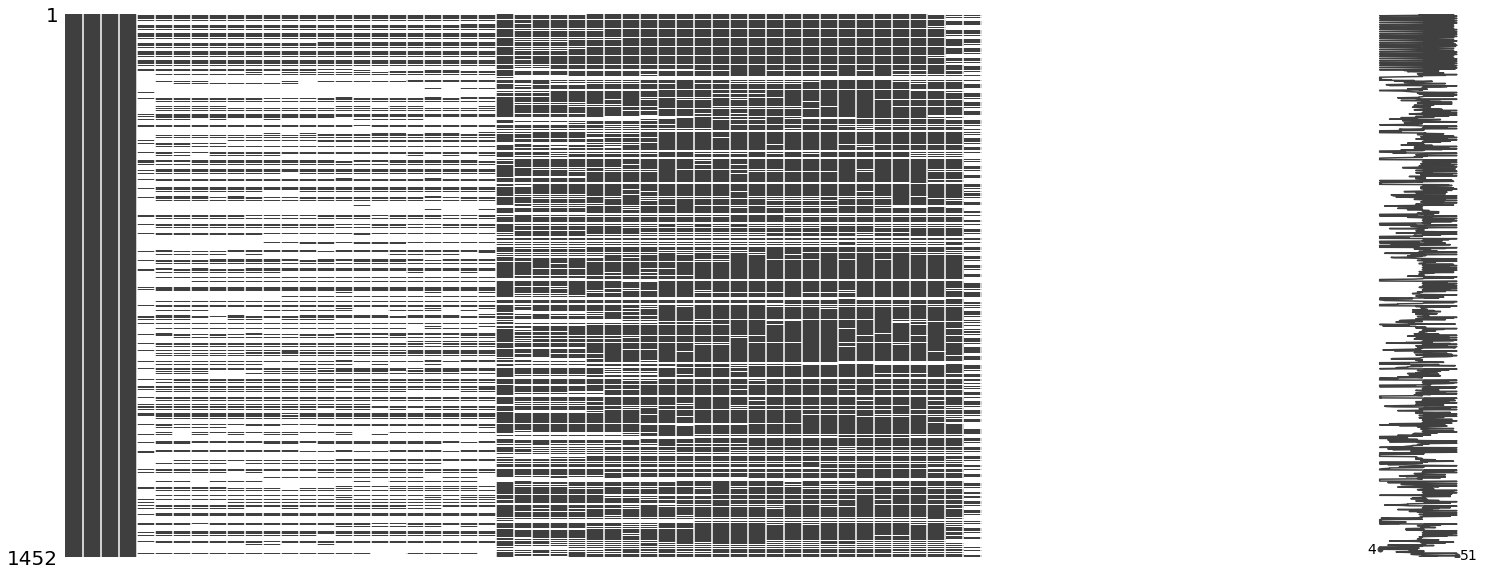

In [230]:
#Visualisation de données manquantes
msno.matrix(data_pertinents)

In [231]:
#Il y a toujours de données manquantes
#un nettoyage se posera à nouveau

In [232]:
# II-Analyser la qualité des données :

In [233]:
#Supprimer les colonnes avec plus de 50% de données manquantes

cols_manquantes = data_pertinents.columns[data_pertinents.isnull().any()]
for i in cols_manquantes:
    if data_pertinents[i].isnull().sum()*100/data_pertinents.shape[0]>50:
        data_pertinents.drop(i,axis=1,inplace=True)

In [234]:
data_pertinents.shape 

(1452, 30)

In [235]:
#Pourcentage de données manquantes dans data_pertinents:

percent=round(100*(data_pertinents.isnull().sum().sum())/(len(data_pertinents.axes[1])*len(data_pertinents.axes[0])))
print(str(percent)+" % données manquantes")

21 % données manquantes


In [236]:
#Pourcentage de valeurs manquantes dans chaque ligne
#et ajouter le résultat sous forme de colonne miss_count(%)

data_pertinents["miss_count(%)"]=data_pertinents.isnull().sum(axis=1)*(100/(len(data_pertinents.axes[1])))


In [237]:
# Supprimer les lignes contient plus 50% de valeurs manquantes 

data_pertinents.drop( data_pertinents[ data_pertinents["miss_count(%)"] >50 ].index,inplace=True)

In [238]:
#(Nombre de lignes, Nombre de colonnes) dans le nouveau jeu de données

data_pertinents.drop("miss_count(%)",axis=1,inplace=True) #supprimer la colonne miss_count(%)
data_pertinents.shape


(1184, 30)

In [239]:
#Pourcentage de données manquantes dans data_pertinents après nettoyage des lignes:

percent=round(100*(data_pertinents.isnull().sum().sum())/(len(data_pertinents.axes[1])*len(data_pertinents.axes[0])))
print(str(percent)+" % données manquantes")

9 % données manquantes


In [240]:
#initialisation de l'index

data_pertinents.reset_index(inplace=True, drop=True) 

In [241]:
# Imputation KNN des données manquantes : Remplacer les valeurs manquantes avec des valeurs substituées
                                         #pour éviter le biai sur l'analyse

# importation  KNNimputer 
from sklearn.impute import KNNImputer

data_pertinents2 =data_pertinents.drop(["Country_Name", "Country_Code","Indicator_Name","Indicator_Code"], axis=1)

imputer = KNNImputer(n_neighbors=5)
data_pertinents_imputed= pd.DataFrame(imputer.fit_transform(data_pertinents2),columns=data_pertinents2.columns)


In [242]:
#Concaténation 

df1=data_pertinents.iloc[:,0:4]    # les 4 premières colonnes
df1.reset_index(inplace=True, drop=True)  #l'initialisation de l'index est nécessaire avant la concaténation 
data_pertinents_imputed2 = pd.concat([df1,data_pertinents_imputed], axis=1) 

In [243]:
data_pertinents_imputed2

,Country_Name,Country_Code,Indicator_Name,Indicator_Code,1990,1991,1992,1993,1994,1995,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Arab World,ARB,GNI (current US$),NY.GNP.MKTP.CD,4.637186e+11,4.457131e+11,4.771400e+11,4.821527e+11,4.908228e+11,5.356056e+11,...,1.408716e+12,1.653940e+12,2.086353e+12,1.784156e+12,2.072484e+12,2.515669e+12,2.755869e+12,2.846448e+12,2.459660e+12,2.092734e+12
1,Arab World,ARB,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,6.580709e+03,6.929796e+03,7.219502e+03,7.357161e+03,7.488242e+03,7.654712e+03,...,1.235684e+04,1.313271e+04,1.382449e+04,1.385250e+04,1.428402e+04,1.499616e+04,1.584650e+04,1.614156e+04,1.568558e+04,1.544001e+04
2,Arab World,ARB,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,5.309990e+01,5.310222e+01,5.185363e+01,5.243476e+01,5.442392e+01,5.435938e+01,...,6.584793e+01,6.469816e+01,6.534229e+01,6.682890e+01,6.805088e+01,7.069149e+01,7.171656e+01,7.027469e+01,7.073505e+01,7.610755e+01
3,Arab World,ARB,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,1.117002e+01,1.089176e+01,1.149476e+01,1.238011e+01,1.298279e+01,1.381888e+01,...,2.219148e+01,2.273654e+01,2.343787e+01,2.409880e+01,2.476180e+01,2.427387e+01,2.577601e+01,2.733034e+01,2.817496e+01,3.020790e+01
4,Arab World,ARB,Internet users (per 100 people),IT.NET.USER.P2,0.000000e+00,2.567788e+00,1.344898e+00,6.093447e-03,1.220780e-02,1.702505e-02,...,1.165465e+01,1.420590e+01,1.859353e+01,2.297369e+01,2.674725e+01,2.970776e+01,3.401422e+01,3.686860e+01,4.162623e+01,4.582156e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179,Zimbabwe,ZWE,GNI (current US$),NY.GNP.MKTP.CD,8.511817e+09,8.337482e+09,6.471096e+09,6.315813e+09,6.594675e+09,6.785271e+09,...,5.131055e+09,4.929377e+09,3.972333e+09,7.356418e+09,8.714543e+09,1.009815e+10,1.202891e+10,1.357417e+10,1.403881e+10,1.432232e+10
1180,Zimbabwe,ZWE,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,1.630000e+03,1.730000e+03,1.560000e+03,1.590000e+03,1.730000e+03,1.730000e+03,...,1.370000e+03,1.320000e+03,1.050000e+03,1.100000e+03,1.240000e+03,1.390000e+03,1.610000e+03,1.750000e+03,1.790000e+03,1.790000e+03
1181,Zimbabwe,ZWE,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,4.508042e+01,4.661952e+01,4.152413e+01,3.896341e+01,3.890735e+01,4.050717e+01,...,4.078766e+01,4.315076e+01,4.591564e+01,4.765959e+01,4.769994e+01,4.830717e+01,4.667318e+01,4.757019e+01,5.874488e+01,5.476677e+01
1182,Zimbabwe,ZWE,Internet users (per 100 people),IT.NET.USER.P2,0.000000e+00,2.925740e-01,1.880206e-02,2.129635e-02,1.739280e-03,7.683540e-03,...,2.400000e+00,3.000000e+00,3.500000e+00,4.000000e+00,6.400000e+00,8.400000e+00,1.200000e+01,1.550000e+01,1.636474e+01,2.274282e+01


In [244]:
data_pertinents_imputed.shape

(1184, 26)

In [245]:
#Pourcentage de données manquantes après l'imputation: 

percent=round(100*(data_pertinents_imputed2.isnull().sum().sum())/(len(data_pertinents_imputed2.axes[1])*len(data_pertinents_imputed2.axes[0])))
print(str(percent)+" % données manquantes")

0 % données manquantes


In [246]:
#Exportation de jeu de données nettoyé

data_pertinents_imputed2.to_csv ("data_pertinents.csv",index=False, header=True)

In [247]:
#Exportation de jeu de données de chaque indicateur 

for i in indicateursPertinents:
    data_Exp=data_pertinents_imputed2.drop(data_pertinents_imputed2[data_pertinents_imputed2["Indicator_Code"]!=i].index)
    data_Exp.to_csv("data_"+i+".csv",index=False,header=True)

In [248]:
#Indicateurs statistiques classiques pour les différentes zones géographiques et pays du monde 
#(moyenne/médiane/écart-type par pays et par continent ou bloc géographique)
#avec les indicateurs pertinents

data_stat=data_pertinents_imputed2.copy()

data_stat1=data_stat.drop(["Country_Code", "Indicator_Code"], axis=1)

data_stat2=data_stat1.pivot(index='Country_Name',columns='Indicator_Name').stack(0).rename_axis(['Country_Name','date']).reset_index()

stats=data_stat2.groupby('Country_Name').agg(['mean','median','std'])


In [249]:
stats

GNI (current US$)                              \
                                mean        median           std   
Country_Name                                                       
Afghanistan             8.486709e+09  4.723224e+09  6.448278e+09   
Albania                 6.727369e+09  5.223613e+09  4.566408e+09   
Algeria                 9.829538e+10  6.268214e+10  6.189091e+10   
Andorra                          NaN           NaN           NaN   
Angola                  3.721010e+10  1.166258e+10  4.070360e+10   
...                              ...           ...           ...   
West Bank and Gaza      6.289697e+09  4.802800e+09  3.806697e+09   
World                   4.582809e+13  3.671579e+13  1.934034e+13   
Yemen, Rep.             1.607042e+10  1.031384e+10  1.211367e+10   
Zambia                  9.953932e+09  4.405628e+09  8.560902e+09   
Zimbabwe                7.746908e+09  6.548700e+09  2.857614e+09   

                   GNI per capita, PPP (current international $)               \
                                                            mean       median   
Country_Name                                                                    
Afghanistan                                          1094.153846   899.000000   
Albania                                              5854.615385  5060.000000   
Algeria                                              9492.692308  8920.000000   
Andorra                                                      NaN          NaN   
Angola                                               3339.230769  2535.000000   
...                                                          ...          ...   
West Bank and Gaza                                           NaN          NaN   
World                                                9564.895842  8601.831985   
Yemen, Rep.                                          3043.461538  2990.000000   
Zambia                                               2147.307692  1800.000000   
Zimbabwe                                             1632.307692  1680.000000   

                                 \
                            std   
Country_Name                      
Afghanistan          448.866991   
Albania             3233.392312   
Algeria             2845.865152   
Andorra                     NaN   
Angola              1670.487170   
...                         ...   
West Bank and Gaza          NaN   
World               3324.742061   
Yemen, Rep.          616.460492   
Zambia               845.636128   
Zimbabwe             275.278880   

                   Gross enrolment ratio, secondary, both sexes (%)  \
                                                               mean   
Country_Name                                                          
Afghanistan                                               27.125724   
Albania                                                   80.033149   
Algeria                                                   73.486336   
Andorra                                                         NaN   
Angola                                                    18.638368   
...                                                             ...   
West Bank and Gaza                                        80.433152   
World                                                     63.320348   
Yemen, Rep.                                                     NaN   
Zambia                                                          NaN   
Zimbabwe                                                  44.025298   

                                          \
                       median        std   
Country_Name                               
Afghanistan         19.224245  18.454401   
Albania             77.404930   9.712059   
Algeria             70.920532  13.964747   
Andorra                   NaN        NaN   
Angola              17.378458   7.748168   
...                       ...        ...   
West Bank and Gaza  82.206028   6.945915   
World

In [250]:
#Exportation 
stats.to_csv("stats.csv",index=True,header=True)

In [251]:
# III-Chercher les pays avec un fort potentiel de clients 

#Calculer le score par indicateur : la somme de fois où l'inducateur d'un pays atteint la moyenne mondiale sur une année 

#par exemple Calculant le score pour chaque pays par l'indicateur Internet users (per 100 people) 
#(test sur un seul indicateur avant la généralisation) 

#Importation de jeu de données de l'indicateur Internet users (per 100 people)
data_internet=pd.read_csv("data_IT.NET.USER.P2.csv")

#Transformer les valeurs de l'indicateur Internet users (per 100 people) en valeurs Booléennes (1 pour une valeur > la moyenne)
for i in data_internet.iloc[:,4:30]:
    data_internet[i] = data_internet[i].apply(lambda x: 0 if x < data_internet[i].mean() else 1)

In [252]:
#Transformation des valeurs de l'indicateur Internet users (per 100 people) en valeurs Booléennes (1 pour une valeur > la moyenne)
for i in data_internet.iloc[:,4:30]:
    data_internet[i] = data_internet[i].apply(lambda x: 0 if x < data_internet[i].mean() else 1)

#Calcule de score imputé de chaque pays par l'indicateur Internet users (per 100 people)

data_internet["score_internet"]=data_internet.iloc[:,4:30].sum(axis=1)   

In [253]:
data_internet 

,Country_Name,Country_Code,Indicator_Name,Indicator_Code,1990,1991,1992,1993,1994,1995,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,score_internet
0,Arab World,ARB,Internet users (per 100 people),IT.NET.USER.P2,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,East Asia & Pacific,EAS,Internet users (per 100 people),IT.NET.USER.P2,0,1,0,0,0,0,...,0,0,0,1,1,1,1,1,1,7
2,East Asia & Pacific (excluding high income),EAP,Internet users (per 100 people),IT.NET.USER.P2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Euro area,EMU,Internet users (per 100 people),IT.NET.USER.P2,0,0,0,0,1,1,...,1,1,1,1,1,1,1,1,1,22
4,Europe & Central Asia,ECS,Internet users (per 100 people),IT.NET.USER.P2,0,1,0,0,0,1,...,1,1,1,1,1,1,1,1,1,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,Virgin Islands (U.S.),VIR,Internet users (per 100 people),IT.NET.USER.P2,0,1,1,1,1,1,...,1,0,0,0,0,1,1,1,1,21
225,West Bank and Gaza,PSE,Internet users (per 100 people),IT.NET.USER.P2,0,1,0,0,0,0,...,0,0,1,1,1,1,1,1,1,8
226,"Yemen, Rep.",YEM,Internet users (per 100 people),IT.NET.USER.P2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
227,Zambia,ZMB,Internet users (per 100 people),IT.NET.USER.P2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [254]:
#Exemple vérification de transformation
data_internet["1992"].mean() 

0.2314410480349345

In [255]:
#Exemple vérification de transformation
data_internet["1990"].mean() 

0.06550218340611354

In [256]:
#Maintenant généralisation sur l'ensemble des indicateurs 

#Transformer les valeurs de chaque indicateur en valeurs Booléennes (1 pour une valeur supérieure à la moyenne interclasse )
#et calculer le score total de chaque pays par indicateur 

indicateursPertinents = ["IT.NET.USER.P2","SP.POP.1524.TO.UN", "NY.GNP.PCAP.PP.CD","NY.GNP.MKTP.CD",
                         "SE.SEC.ENRR", "SE.TER.ENRR"]

list_de_df = list() #pour stocker les dataframes contenant le score de chaque pays par indicateur (il y a 6 dataframes)
for i in indicateursPertinents:
    df=pd.read_csv("data_"+i+".csv")
    for j in df.iloc[:,4:30]:
        df[j] = df[j].apply(lambda x: 0 if x < df[j].mean() else 1) 
        df["score_"+i]=df.iloc[:,4:30].sum(axis=1)
    list_de_df.append(df)

In [257]:
#exemple : score_NY.GNP.MKTP.CD

list_de_df[3]

,Country_Name,Country_Code,Indicator_Name,Indicator_Code,1990,1991,1992,1993,1994,1995,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,score_NY.GNP.MKTP.CD
0,Arab World,ARB,GNI (current US$),NY.GNP.MKTP.CD,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,10
1,East Asia & Pacific,EAS,GNI (current US$),NY.GNP.MKTP.CD,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,26
2,East Asia & Pacific (excluding high income),EAP,GNI (current US$),NY.GNP.MKTP.CD,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,26
3,Euro area,EMU,GNI (current US$),NY.GNP.MKTP.CD,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,26
4,Europe & Central Asia,ECS,GNI (current US$),NY.GNP.MKTP.CD,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,Vietnam,VNM,GNI (current US$),NY.GNP.MKTP.CD,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
217,West Bank and Gaza,PSE,GNI (current US$),NY.GNP.MKTP.CD,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
218,"Yemen, Rep.",YEM,GNI (current US$),NY.GNP.MKTP.CD,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
219,Zambia,ZMB,GNI (current US$),NY.GNP.MKTP.CD,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [258]:
#Merge des dataframes contenant les scores pour générer une liste de pays
#avec un fort potentiel de clients

list_score=list()
data_score = list_de_df[0]
for df in list_de_df[1:]:
    data_score=pd.merge(data_score,df, on="Country_Name", how="outer",suffixes=('', '_drop'))  #Merge
    data_score.drop([col for col in data_score.columns if 'drop' in col], axis=1, inplace=True) 
    list_score.append(data_score)
    
data_score=list_score[4].loc[:,[ "Country_Name","Country_Code","score_IT.NET.USER.P2",
                                "score_SP.POP.1524.TO.UN","score_NY.GNP.PCAP.PP.CD","score_NY.GNP.MKTP.CD",
                                "score_SE.SEC.ENRR","score_SE.TER.ENRR"]]   #garder les colonnes importantes 

In [259]:
data_score1=data_score.copy() #une copie de data_score 

In [260]:
data_score1["score1"]=data_score1.iloc[:,2:8].sum(axis=1) #Calcule de score total par pays sans intervenir 
                                                          #des coefficients par indicateur

In [261]:
#Trier par score1
data_score1_sort=data_score1.sort_values(by="score1", ascending=False)

In [262]:
data_score1_sort.to_csv("score1.csv",header=True,index=False)

In [263]:
data_score1_sort.iloc[0:50,]  # Remarque : penser à remplacer NaN par 0 (dû au merge par Outer)  
                              # Ex : NaN pour Germany avec le score score_SE.TER.ENRR

,Country_Name,Country_Code,score_IT.NET.USER.P2,score_SP.POP.1524.TO.UN,score_NY.GNP.PCAP.PP.CD,score_NY.GNP.MKTP.CD,score_SE.SEC.ENRR,score_SE.TER.ENRR,score1
218,United States,USA,25.0,26.0,26.0,26.0,26.0,26.0,155.0
117,Japan,JPN,22.0,26.0,26.0,26.0,26.0,26.0,152.0
88,France,FRA,22.0,26.0,26.0,26.0,26.0,26.0,152.0
217,United Kingdom,GBR,22.0,26.0,26.0,26.0,26.0,26.0,152.0
115,Italy,ITA,18.0,13.0,26.0,24.0,26.0,26.0,133.0
18,North America,NAC,25.0,NaN,26.0,26.0,26.0,26.0,129.0
19,OECD members,OED,24.0,NaN,26.0,26.0,26.0,26.0,128.0
8,High income,HIC,24.0,NaN,26.0,26.0,26.0,26.0,128.0
93,Germany,DEU,23.0,26.0,26.0,26.0,26.0,NaN,127.0
3,Euro area,EMU,22.0,NaN,26.0,26.0,26.0,26.0,126.0


In [264]:
data_score1_sort.iloc[0:12,]  # Remarque : penser à remplacer NaN par 0 (dû au merge par Outer)  
                              # Ex : NaN pour Germany avec le score score_SE.TER.ENRR

,Country_Name,Country_Code,score_IT.NET.USER.P2,score_SP.POP.1524.TO.UN,score_NY.GNP.PCAP.PP.CD,score_NY.GNP.MKTP.CD,score_SE.SEC.ENRR,score_SE.TER.ENRR,score1
218,United States,USA,25.0,26.0,26.0,26.0,26.0,26.0,155.0
117,Japan,JPN,22.0,26.0,26.0,26.0,26.0,26.0,152.0
88,France,FRA,22.0,26.0,26.0,26.0,26.0,26.0,152.0
217,United Kingdom,GBR,22.0,26.0,26.0,26.0,26.0,26.0,152.0
115,Italy,ITA,18.0,13.0,26.0,24.0,26.0,26.0,133.0
18,North America,NAC,25.0,NaN,26.0,26.0,26.0,26.0,129.0
19,OECD members,OED,24.0,NaN,26.0,26.0,26.0,26.0,128.0
8,High income,HIC,24.0,NaN,26.0,26.0,26.0,26.0,128.0
93,Germany,DEU,23.0,26.0,26.0,26.0,26.0,NaN,127.0
3,Euro area,EMU,22.0,NaN,26.0,26.0,26.0,26.0,126.0


In [265]:
#Générer avec un score pondéré 

#Calculer le score total pondéré de chaque pays (avec
#des coefficients par indicateur)

data_score2=data_score.copy() 

#Remplacer NaN par 0 
data_score2=data_score2.fillna(0)

coef=[4,8,3,2,1,2] #choie par degé d'importance

data_score2["score"]=np.average(data_score2.iloc[:,2:8], weights=coef, axis=1)
data_score2_sort=data_score2.sort_values(by="score", ascending=False) #Trier le jeu de données par score2

In [266]:
data_score2_sort.to_csv("score.csv",header=True,index=False)

In [267]:
data_score2_sort.iloc[0:50] #afficher les 20 premiers pays 

,Country_Name,Country_Code,score_IT.NET.USER.P2,score_SP.POP.1524.TO.UN,score_NY.GNP.PCAP.PP.CD,score_NY.GNP.MKTP.CD,score_SE.SEC.ENRR,score_SE.TER.ENRR,score
218,United States,USA,25.0,26.0,26.0,26.0,26.0,26.0,25.80
117,Japan,JPN,22.0,26.0,26.0,26.0,26.0,26.0,25.20
217,United Kingdom,GBR,22.0,26.0,26.0,26.0,26.0,26.0,25.20
88,France,FRA,22.0,26.0,26.0,26.0,26.0,26.0,25.20
93,Germany,DEU,23.0,26.0,26.0,26.0,26.0,0.0,22.80
123,"Korea, Rep.",KOR,20.0,20.0,26.0,0.0,26.0,26.0,19.80
115,Italy,ITA,18.0,13.0,26.0,24.0,26.0,26.0,19.00
31,Argentina,ARG,10.0,24.0,20.0,0.0,26.0,26.0,18.50
176,Russian Federation,RUS,7.0,26.0,11.0,2.0,26.0,26.0,17.55
211,Turkey,TUR,9.0,26.0,6.0,0.0,18.0,17.0,15.70


In [268]:
#Générer une liste de pays avec un fort potentiel de clients
pays_potentiel=data_score2_sort.drop(data_score2_sort.iloc[:,2:8],axis=1)
pays_potentiel=pays_potentiel.iloc[0:10,] #garder que les 10 premiers pays 
 
pays_potentiel.reset_index(inplace=True, drop=True) 
pays_potentiel

,Country_Name,Country_Code,score
0,United States,USA,25.80
1,Japan,JPN,25.20
2,United Kingdom,GBR,25.20
3,France,FRA,25.20
4,Germany,DEU,22.80
5,"Korea, Rep.",KOR,19.80
6,Italy,ITA,19.00
7,Argentina,ARG,18.50
8,Russian Federation,RUS,17.55
9,Turkey,TUR,15.70


In [269]:
list_pays= pays_potentiel["Country_Code"].tolist()  #liste de pays avec un fort potentiel de clients

In [270]:
data_pertinents=pd.read_csv("data_pertinents.csv") 

In [271]:
#le jeu de données des indicateurs pertinents et pays à fort potentiel de clients

pays_potentiel_indicateurs=data_pertinents.loc[data_pertinents["Country_Code"].isin(list_pays)]

In [272]:
pays_potentiel_indicateurs.reset_index(inplace=True, drop=True)

In [273]:
pays_potentiel_indicateurs

,Country_Name,Country_Code,Indicator_Name,Indicator_Code,1990,1991,1992,1993,1994,1995,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Argentina,ARG,GNI (current US$),NY.GNP.MKTP.CD,1.351500e+11,1.838574e+11,2.245306e+11,2.336698e+11,2.537435e+11,2.533628e+11,...,2.249197e+11,2.800354e+11,3.526073e+11,3.227325e+11,4.091479e+11,5.151523e+11,5.331449e+11,5.402454e+11,5.155829e+11,5.735346e+11
1,Argentina,ARG,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,6.680000e+03,7.780000e+03,8.890000e+03,9.570000e+03,1.019000e+04,9.950000e+03,...,1.473000e+04,1.643000e+04,1.727000e+04,1.611000e+04,1.771000e+04,1.907000e+04,1.912000e+04,1.973000e+04,1.940000e+04,1.999000e+04
2,Argentina,ARG,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,7.115185e+01,7.163714e+01,7.490543e+01,7.554784e+01,6.873015e+01,8.247188e+01,...,9.334507e+01,9.370675e+01,9.524628e+01,9.883082e+01,1.018011e+02,1.035997e+02,1.051926e+02,1.063231e+02,1.067779e+02,9.743832e+01
3,Argentina,ARG,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,3.838155e+01,3.822400e+01,4.288460e+01,4.446407e+01,3.678814e+01,4.662574e+01,...,6.683110e+01,6.635091e+01,6.814136e+01,7.053329e+01,7.393920e+01,7.745389e+01,7.897288e+01,7.998670e+01,8.291739e+01,8.332506e+01
4,Argentina,ARG,Internet users (per 100 people),IT.NET.USER.P2,0.000000e+00,2.359754e+00,2.992874e-03,2.952707e-02,4.370595e-02,8.627708e-02,...,2.092720e+01,2.594663e+01,2.811262e+01,3.400000e+01,4.500000e+01,5.100000e+01,5.580000e+01,5.990000e+01,6.470000e+01,6.804306e+01
5,Argentina,ARG,"Population, ages 15-24, total",SP.POP.1524.TO.UN,5.269979e+06,5.429052e+06,5.609152e+06,5.797369e+06,5.976097e+06,6.132263e+06,...,6.635289e+06,6.681531e+06,6.735471e+06,6.786921e+06,6.828321e+06,6.858723e+06,6.880259e+06,6.892160e+06,6.894149e+06,6.886530e+06
6,France,FRA,GNI (current US$),NY.GNP.MKTP.CD,1.280817e+12,1.280630e+12,1.417074e+12,1.339380e+12,1.408555e+12,1.617311e+12,...,2.371774e+12,2.718537e+12,2.985883e+12,2.741938e+12,2.700866e+12,2.928599e+12,2.719447e+12,2.847670e+12,2.890201e+12,2.470430e+12
7,France,FRA,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,1.772000e+04,1.848000e+04,1.914000e+04,1.941000e+04,2.017000e+04,2.094000e+04,...,3.320000e+04,3.486000e+04,3.591000e+04,3.539000e+04,3.676000e+04,3.832000e+04,3.818000e+04,4.004000e+04,4.080000e+04,4.180000e+04
8,France,FRA,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,9.685092e+01,1.014943e+02,1.052578e+02,1.058775e+02,1.142035e+02,1.142231e+02,...,1.120745e+02,1.118373e+02,1.116256e+02,1.111785e+02,1.113269e+02,1.112224e+02,1.116653e+02,1.109407e+02,1.106440e+02,1.144732e+02
9,France,FRA,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,3.696326e+01,3.948390e+01,4.281393e+01,4.571888e+01,4.950629e+01,5.031515e+01,...,5.547609e+01,5.482254e+01,5.451991e+01,5.493871e+01,5.712708e+01,5.802498e+01,5.998763e+01,6.214687e+01,6.439047e+01,6.891474e+01


In [274]:
# IV-Représentation graphique : 

In [275]:
#pays potentiels avec l'indicateur GNI per capita, PPP (current international $)

pays_GNI=pays_potentiel_indicateurs[pays_potentiel_indicateurs["Indicator_Code"]=="NY.GNP.PCAP.PP.CD"]

In [276]:
data2=pays_GNI.drop(columns=["Indicator_Code", "Indicator_Name","Country_Code"])

In [277]:
# Remodèle ou transforme de dataframe

data_melt=pd.melt(data2,id_vars="Country_Name",var_name="Date",value_name="GNI per capita, PPP (current international $)")

In [278]:
data_melt

,Country_Name,Date,"GNI per capita, PPP (current international $)"
0,Argentina,1990,6680.0
1,France,1990,17720.0
2,Germany,1990,19740.0
3,Italy,1990,18320.0
4,Japan,1990,19590.0
...,...,...,...
255,"Korea, Rep.",2015,34520.0
256,Russian Federation,2015,23060.0
257,Turkey,2015,23800.0
258,United Kingdom,2015,41190.0


In [279]:
#Pivote table nécessaire pour créer les graphiques

pivoted= data_melt.pivot(index='Date', columns='Country_Name')
pivoted

GNI per capita, PPP (current international $)                    \
Country_Name                                     Argentina   France  Germany   
Date                                                                           
1990                                                6680.0  17720.0  19740.0   
1991                                                7780.0  18480.0  21130.0   
1992                                                8890.0  19140.0  21850.0   
1993                                                9570.0  19410.0  21930.0   
1994                                               10190.0  20170.0  22780.0   
1995                                                9950.0  20940.0  23520.0   
1996                                               10540.0  21650.0  24090.0   
1997                                               11440.0  22630.0  24550.0   
1998                                               11830.0  23770.0  25200.0   
1999                                               11460.0  24930.0  26140.0   
2000                                               11500.0  26680.0  27100.0   
2001                                               11090.0  28180.0  28300.0   
2002                                                9480.0  28930.0  28980.0   
2003                                               10530.0  28610.0  29720.0   
2004                                               11720.0  29590.0  31660.0   
2005                                               13290.0  31140.0  32250.0   
2006                                               14730.0  33200.0  34850.0   
2007                                               16430.0  34860.0  36970.0   
2008                                               17270.0  35910.0  38400.0   
2009                                               16110.0  35390.0  37910.0   
2010                                               17710.0  36760.0  40040.0   
2011                                               19070.0  38320.0  43770.0   
2012                                               19120.0  38180.0  44590.0   
2013                                               19730.0  40040.0  46250.0   
2014                                               19400.0  40800.0  48130.0   
2015                                               19990.0  41800.0  49060.0   

                                                                        \
Country_Name    Italy    Japan Korea, Rep. Russian Federation   Turkey   
Date                                                                     
1990          18320.0  19590.0      8260.0             8000.0   6040.0   
1991          19170.0  20860.0      9330.0             7820.0   6190.0   
1992          19720.0  21490.0     10020.0             6790.0   6610.0   
1993          20040.0  21990.0     10850.0             6350.0   7200.0   
1994          20870.0  22560.0     11970.0             5710.0   6770.0   
1995          22000.0  23620.0     13240.0             5560.0   7340.0   
1996          22750.0  24830.0     14370.0             5440.0   7890.0   
1997          23690.0  25460.0     15300.0             5580.0   8480.0   
1998          24780.0  25370.0     14410.0             5220.0   8990.0   
1999          25480.0  25630.0     16200.0             5680.0   8640.0   
2000          26900.0  27180.0     17950.0             6650.0   9440.0   
2001          27910.0  27900.0     19050.0             7270.0   9010.0   
2002          28510.0  28560.0     20690.0             7880.0   9150.0   
2003          28940.0  29320.0     21290.0             8970.0   9430.0   
2004          29420.0  30950.0     22900.0            10010.0  10720.0   
2005          30100.0  32350.0     24010.0            11540.0  11760.0   
2006          32480.0  33920.0     25730.0            14480.0  13480.0   
2007          34010.0  35570.0     27740.0            16280.0  14700.0   
2008          35080.0  35710.0     28650.0            19600.0  15890.0   
2009          34530.0  33910.0     28250.0            18760.0  1

<Figure size 576x432 with 0 Axes>

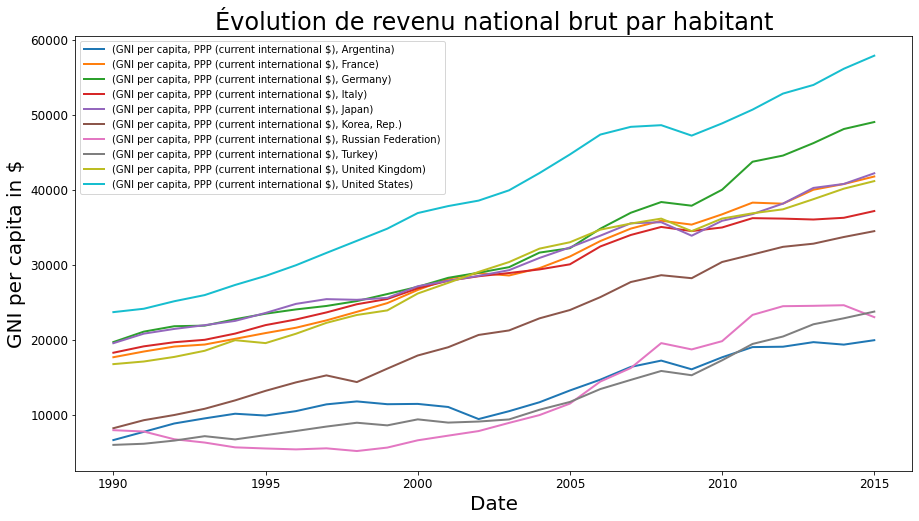

In [280]:
#Représentation graphique de l'évolution  de l'indicateur GNI per capita, PPP (current international $)
#ou RNB par hébitant en $ des pays à fort potentiel

plt.figure(figsize=(8, 6));
plt.rcParams["figure.figsize"] = (15, 8);
pivoted.plot(linewidth=2); 
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);
plt.legend(loc='upper left',fontsize=10); 
plt.title("Évolution de revenu national brut par habitant",fontsize=24); 
plt.xlabel('Date',fontsize=20); plt.ylabel('GNI per capita in $',fontsize=20);

<Figure size 864x576 with 0 Axes>

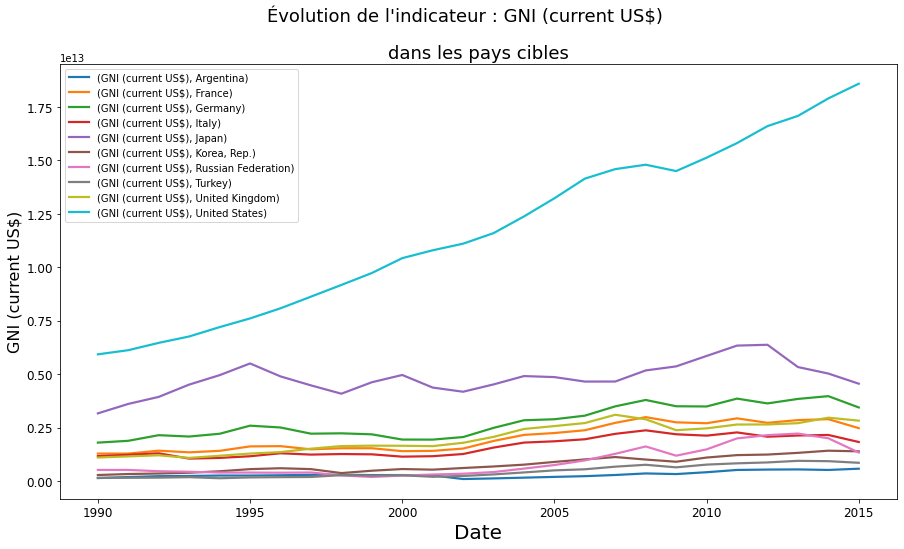

<Figure size 864x576 with 0 Axes>

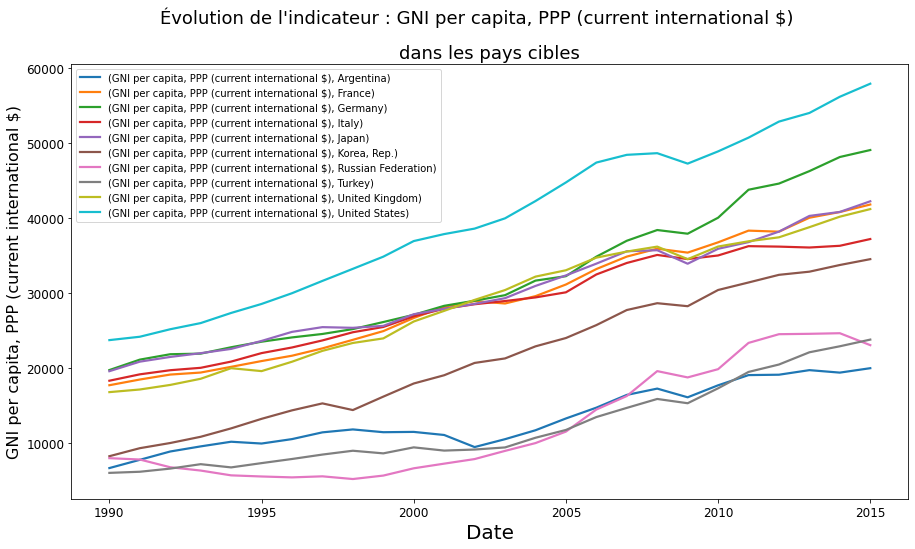

<Figure size 864x576 with 0 Axes>

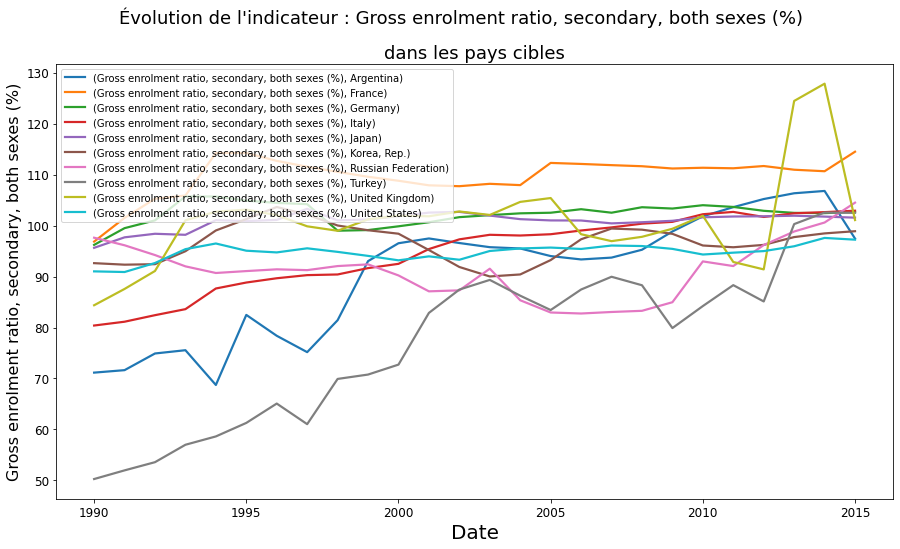

<Figure size 864x576 with 0 Axes>

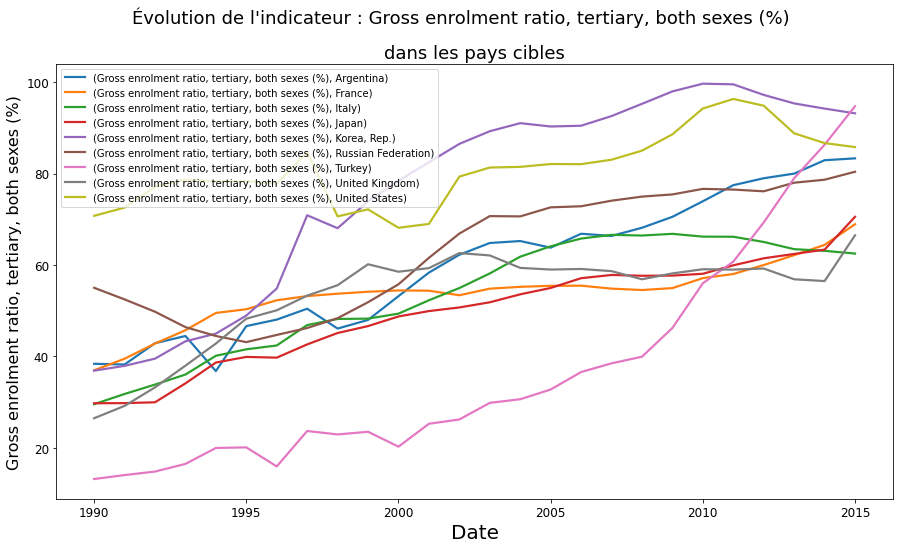

<Figure size 864x576 with 0 Axes>

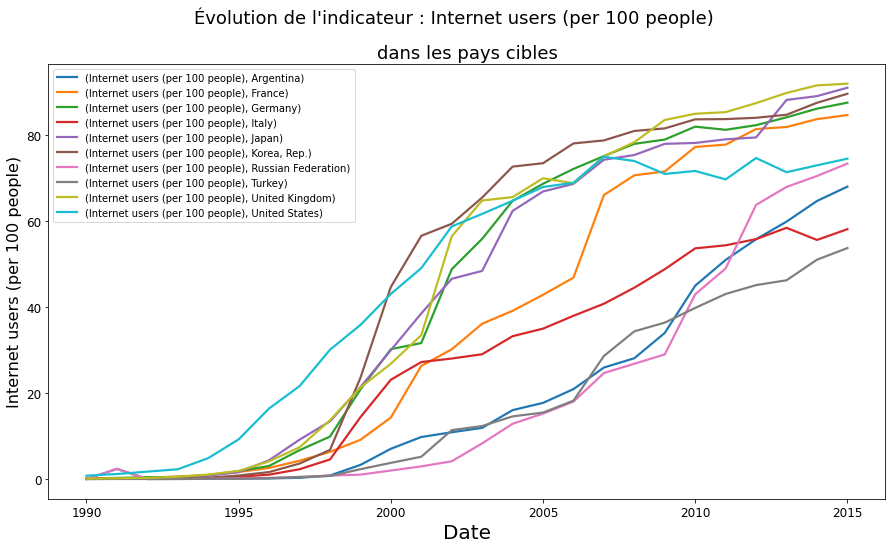

<Figure size 864x576 with 0 Axes>

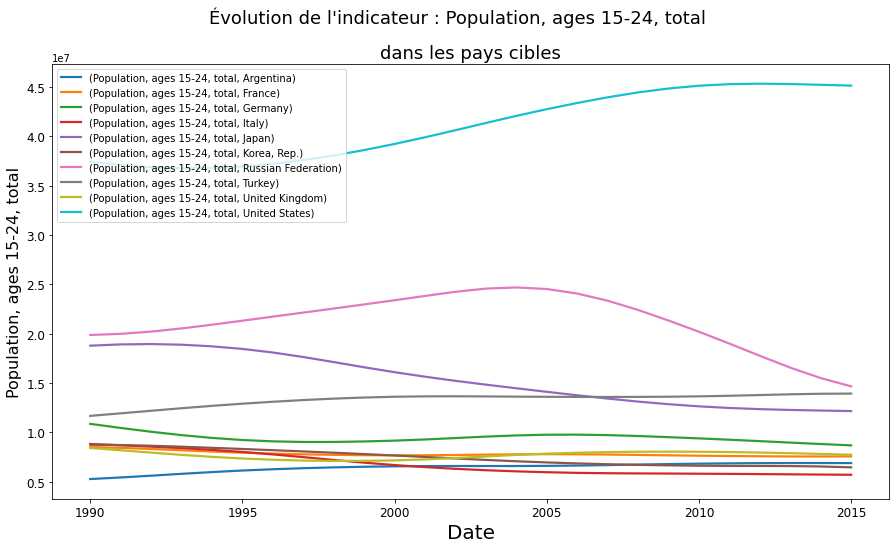

In [281]:
#Représentation graphique de l'évolution des indicateurs pertinents dans les pays à fort potentiel

potentiels_indicateurs=pays_potentiel_indicateurs.copy()
list_pivoted=list()
for i in potentiels_indicateurs.Indicator_Name.unique():
    #pays potentiels avec l'indicateur i    
    pays_ind=potentiels_indicateurs[potentiels_indicateurs["Indicator_Name"]==i]
    
    pays_ind=pays_ind.drop(columns=["Indicator_Code", "Indicator_Name","Country_Code"])
    
    # Remodèle ou transforme de dataframe
    pays_melt=pd.melt(pays_ind,id_vars="Country_Name",var_name="Date",value_name=i) 
    
    #Pivoter dataframe
    pays_pivoted= pays_melt.pivot(index='Date', columns='Country_Name')
    
    #Ajouter dans le liste
    list_pivoted.append(pays_pivoted)
    
    plt.figure(figsize=(12, 8));
    plt.rcParams["figure.figsize"] = (15, 8);
    pays_pivoted.plot(linewidth=2.2); 
    plt.xticks(fontsize=12);
    plt.yticks(fontsize=12);
    plt.legend(loc='upper left',fontsize=10);        
    plt.suptitle("Évolution de l'indicateur : "+i,fontsize=18);
    plt.title("dans les pays cibles",fontsize=18); 
    plt.xlabel('Date',fontsize=20); plt.ylabel(i,fontsize=16);
  